In [2]:
import cv2
import datasets
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dataset = datasets.TDSC2D()

In [28]:
x,m,y = dataset[100]

In [29]:
print(x.shape, m.shape)

(500, 500) (500, 500)


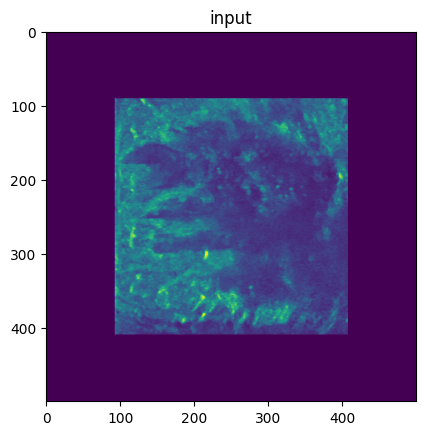

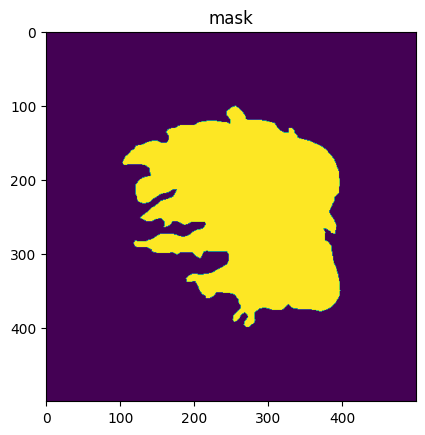

In [35]:
plt.title("input")
plt.imshow(x)
plt.show()
plt.title("mask")
plt.imshow(m)
plt.show()

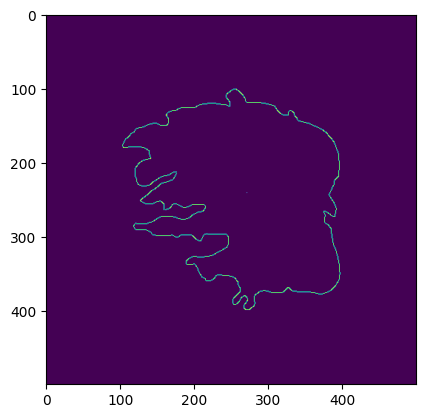

In [60]:
def get_boundary(binary_img):
    uint_img = binary_img.astype(np.uint8)
    return cv2.Canny(uint_img, 0, 1)
boundary = get_boundary(m)
boundary[241, 271] = 128
plt.imshow(boundary)

In [47]:
def find_shape_center(binary_img):
    nonzero_cords = np.nonzero(binary_img)
    x_cords = nonzero_cords[0]
    y_cords = nonzero_cords[1]
    return x_cords.sum()//len(x_cords), y_cords.sum()//len(y_cords)

print(f"sample centers are: {find_shape_center(m)}")

sample centers are: (241, 271)


In [76]:
def signature(binary_image, res=2):
    x0, y0 = find_shape_center(binary_image)
    c = x0 - y0
    boundary = get_boundary(binary_image)
    cords_x, cords_y = np.nonzero(boundary)
    boundary_cords = list(zip(cords_x, cords_y))
    signature = np.zeros([360//res], dtype=np.float32)
    for theta in range(0, 360, res):
        slop = np.tan(np.radians(theta))
        # m.x + c = y => c = tan(theta).x0-y0
        c = -1*slop*x0+y0
        dif_min = 10000
        for x, y in boundary_cords:
            y_pred = slop*x + c
            dif = np.abs(y_pred - y)
            if(dif < dif_min):
                dif_min = dif
                signature[theta//res] = np.sqrt((x0-x)**2 + (y0-y)**2)
    return signature

print(f"signature of sample is: {signature(m)}")

signature of sample is: [122.       132.09467  143.34923  140.80128  134.3503   138.10141
 129.83836  122.72327  123.76187  126.178444 128.7517   141.31525
 140.11781  148.03378  151.64761  154.54773  135.67976  162.80664
 142.41138  171.64207  146.21901  149.40215  151.34729  151.34729
 142.34114  163.24828  149.6262   158.2182   162.80664  140.13208
 133.95895  130.1768   175.76405  179.51323  119.77479  111.66467
 110.36757  101.92154   98.95454  110.42192  122.80879  108.04629
 116.61904  143.34923  112.0714   112.       114.07015  143.34923
 124.67959  113.137085 103.57606  111.40018   65.96969  126.921234
 158.75137  131.91286   96.00521  134.73679  134.61798  123.47064
 136.19104  113.20777  102.34256  134.61798   94.02127   93.723
  92.76314  129.41792   87.69264   75.073296  73.109505 121.82365
 107.415085 121.75796   66.037865 125.89678  125.70601   89.
 130.26895  117.54574   78.77182  123.01626  116.48176  115.44696
 114.54257  114.75626  123.178734 151.84532  129.31357  14

In [39]:
print(np.tan(np.radians(45)))

1.0
